In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import io
import cmath

# Q1.
### Part 1
- plot the sawtooth function

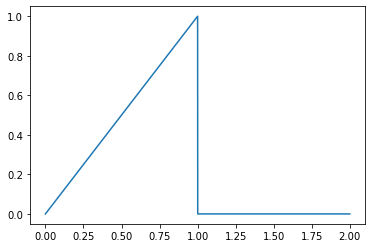

In [2]:
resolution = 0.0001
x = np.arange(0, 2, resolution)

sawtooth = []

# define a sawtooth function
for i in x:
    if i<=1:
        sawtooth.append(i)
    else:
        sawtooth.append(0)

plt.plot(x,sawtooth)

### Part 2
- Approximate the sawtooth function with Fourier series. Plot the approximations for k = 1,3,5,10,25,100

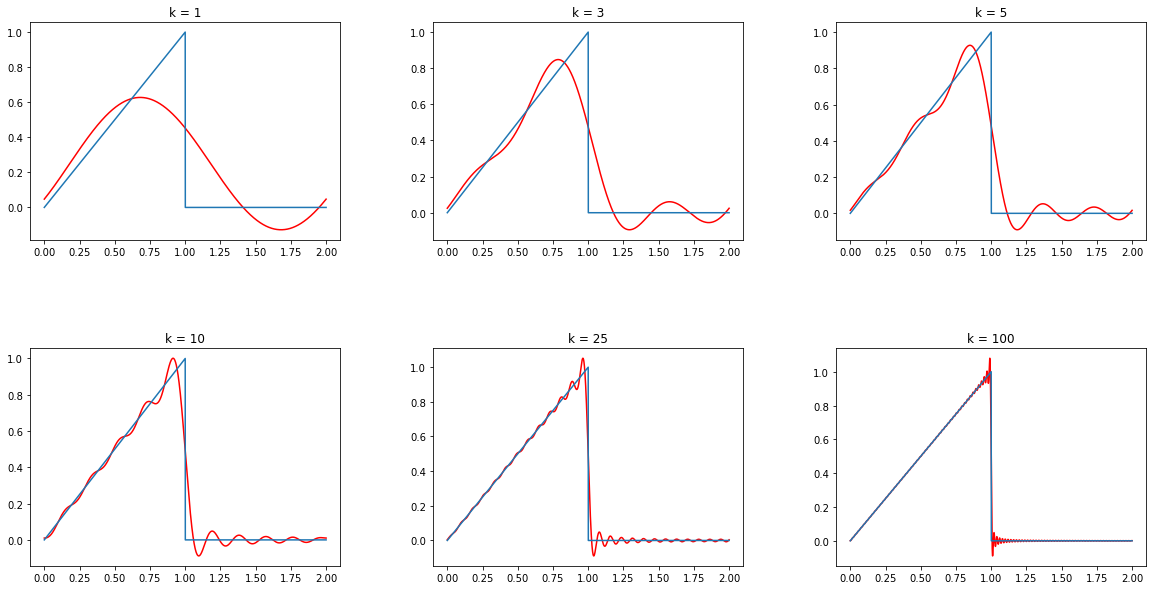

In [3]:
# use fourier series to fit
n_list = [1,3,5,10,25,100]


fig, ax = plt.subplots(2,3, figsize = (20,10))

for idx,n in enumerate(n_list):
    sawtooth_fft = np.zeros_like(x)
    for k in range(0,n+1):
        if k == 0:
            b0 = 1/4
            sawtooth_fft += b0
            continue
        ak = (-1)**(k+1) / (k*np.pi)
        bk = ((-1)**(k) - 1) / (k**2 * np.pi**2)
        sawtooth_fft = sawtooth_fft + ak*np.sin(np.pi*k*x)+ bk*np.cos(np.pi*k*x)
    
    if idx < 3:
        ax[0,idx].title.set_text("k = "+str(n))
        ax[0,idx].plot(x,sawtooth_fft, c = 'r')
        ax[0,idx].plot(x,sawtooth)
    else:
        ax[1,idx-3].title.set_text("k = "+str(n))
        ax[1,idx-3].plot(x,sawtooth_fft, c = 'r')
        ax[1,idx-3].plot(x,sawtooth)

fig.subplots_adjust(wspace=0.3, hspace=0.5)

# Q2. 
- Load the file dataF.mat in your workspace. This file has variables named s and sr which you will need to load. The data has been sampled at Fs = 2000Hz (sampling frequency).

### Part 1
- Create an appropriate time vector t for s based on the information above. Plot s versus that time vector. You will see that this is a sinusoidal variation with 5 complete cycles. From this plot, calculate the frequency of this sinusoid. You can do this by determining the time T taken for 1 complete cycle of the sinusoid. The frequency is given by 1/T.

s is zero in [0.0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35000000000000003, 0.4, 0.45]
Frequency : 10.0


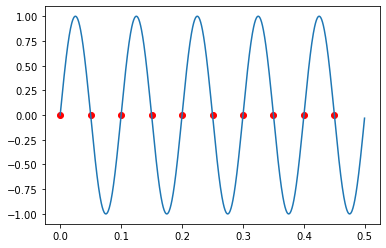

In [9]:
data = io.loadmat("/Users/kunwoosmac/Desktop/2022_Fall/computational mechanics/dataF.mat")
s = data['s'][0]
Fs = 2000 # Hz
dt = 1 / Fs

# time vector : n * dt
t = [n*dt for n in list(range(len(s)))]
plt.plot(t, s)



# get index of s when s == 0
indices = []

for i in range(len(s)):
    if s[i].round(5) == 0:
        indices.append(i)
        
plt.scatter([t[i] for i in indices], np.zeros(len(indices)), c = 'r')
        
# from the plot
T = t[indices[2]] - t[indices[0]]
print("s is zero in", [t[i] for i in indices])
print("="*40)
print("Frequency :", 1/T)

### Part 2
- The plot in the first part shows the functional variation of s with time variable t. 
- So we have : s = s(t) 
- The function s(t) can be approximated by the complex discrete Fourier series (as covered in class)
- n is the total number of data points in s(t)
- fk = Fs * k / n
- So, calculate f0 ~ f6. These are the first 7 frequencies (in H z) which will be present in the Fourier transform of s.


In [10]:
# get f0 ~ f6
n = len(s)
fk = [Fs * k / n for k in range(7)]
for i in range(7):
    print("f{} : {}".format(i, fk[i]))

f0 : 0.0
f1 : 2.0
f2 : 4.0
f3 : 6.0
f4 : 8.0
f5 : 10.0
f6 : 12.0


### Part 3
- Calculate the corresponding coefficients C0−C6
- To calculate some Ck, first calculate fk, then create a vector corresponding to the exponential term. Elementwise multiply the exponential vector with s and then sum all the elements (you can use sum function in matlab or numpy.sum in python).


In [11]:
C = []
for f in fk:
    exp_fk = np.array([cmath.exp(1j * 2 * np.pi * f * tk) for tk in t])
    C.append(np.dot(exp_fk, s) / n)
for i in range(7):
    print("C{} : {}".format(i, C[i]))    

C0 : (-5.822425874768555e-17+0j)
C1 : (-2.080974281781778e-17+5.4496880098897636e-18j)
C2 : (-9.962169977839609e-17-1.2799418643016924e-16j)
C3 : (-1.1287498713485888e-16+1.3431692823945296e-16j)
C4 : (1.0178663467641514e-16+1.3423474571477856e-16j)
C5 : (-3.4645897262208794e-17+0.4999999999999999j)
C6 : (2.3703261575747092e-17+7.297287774044037e-17j)


### Part 4 & 5
- Calculate the corresponding power spectrum (energy) Pk = |Ck|2/n. 
- Out of the frequencies f0 − f6, which frequency has the maximum energy? The answer to this is also the frequency of the sinusoid signal in s and should match your answer in the first part.


In [12]:
P = [(abs(ck))**2 / n for ck in C]
for i in range(7):
    print("P{} : {}".format(i, P[i]))

print("="*40)
print("f{} has maximum energy, and the frequency is {}".format(P.index(max(P)), fk[P.index(max(P))]))
print("The frequency from part 1 was {}, which is close enough".format(1/T))

P0 : 3.390064306717437e-36
P1 : 4.627444955488549e-37
P2 : 2.63069948266578e-35
P3 : 3.078179993237691e-35
P4 : 2.8379485955861253e-35
P5 : 0.0002499999999999999
P6 : 5.886885495049546e-36
f5 has maximum energy, and the frequency is 10.0
The frequency from part 1 was 10.0, which is close enough


### Part 6
- Use the fft command to compute the Fourier coefficients now. While calculating these coefficients, MATLAB/Python does not multiply them with 1/n term. So multiply all of them with 1/n. Now verify that the first 7 coefficients that you get from the fft command (after multiplication with 1/n) are equal or close to the values C0 − C6 that you calculated earlier.


C0
from part 3 : (-5.822425874768555e-17+0j) 
from fft : (-4.829300083516447e-20+0j)
Error Magnitude : 5.817596574685039e-17
----------------------------------------
C1
from part 3 : (-2.080974281781778e-17+5.4496880098897636e-18j) 
from fft : (9.21315036835896e-21+1.8929302569858922e-20j)
Error Magnitude : 2.1515623805560557e-17
----------------------------------------
C2
from part 3 : (-9.962169977839609e-17-1.2799418643016924e-16j) 
from fft : (-8.379431550806593e-20+7.828939443420441e-20j)
Error Magnitude : 1.6220466604812103e-16
----------------------------------------
C3
from part 3 : (-1.1287498713485888e-16+1.3431692823945296e-16j) 
from fft : (-1.056394215291135e-19-7.149836278586009e-20j)
Error Magnitude : 1.754342469083936e-16
----------------------------------------
C4
from part 3 : (1.0178663467641514e-16+1.3423474571477856e-16j) 
from fft : (3.174901277019806e-20-2.617798846929064e-20j)
Error Magnitude : 1.684638014235426e-16
----------------------------------------
C5
fr

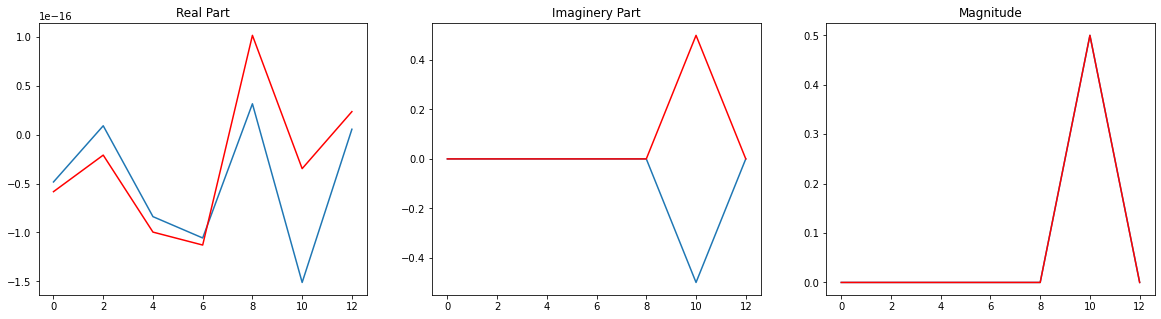

In [13]:
f = np.fft.fft(s)
C_fft = f[0:7]/n
C = np.array(C)

for i in range(7):
    print("C{}\nfrom part 3 : {} \nfrom fft : {}".format(i, C[i], C_fft[i]/n))
    print("Error Magnitude :", abs(C[i]- C_fft[i]/n))
    print("-"*40)

fig, ax = plt.subplots(1,3, figsize = (20,5))

ax[0].set_title("Real Part")
ax[0].plot(fk, C_fft.real)
ax[0].plot(fk, C.real, c = 'r')

ax[1].set_title("Imaginery Part")
ax[1].plot(fk, C_fft.imag)
ax[1].plot(fk, C.imag, c = 'r')

ax[2].set_title("Magnitude")
ax[2].plot(fk, abs(C_fft))
ax[2].plot(fk, abs(np.array(C)), c = 'r')

- It is not very close, but mostly similar enough in real part.
- For imaginery part, it has different sign at f5.
- Magnitude is almost same

# Q3
- The data in sr has been sampled at 2000Hz. I have created the sr by mixing 4 different sines with random noise.
### Part 1
- Create an appropriate time vector for sr based on the information above. Plot sr versus that time vector.

In [ ]:
sr = data['sr'][0]
Fs = 2000 
dt = 1 / Fs

# time vector : n * dt
t = [n*dt for n in list(range(len(s)))]
plt.figure(figsize = (20,10))
plt.plot(t, sr)

### Part 2
- Plot the absolute values of the Fourier coefficients (as determined from fft command) against an appropriate frequency vector. The plot should show 4 distinct peaks.

In [ ]:
sr_fft = abs(np.fft.fft(sr))
fk = [Fs * k / len(sr) for k in range(len(sr))]

# Only half is useful
sr_fft = sr_fft[:int(len(sr_fft)/2)]
fk = fk[:int(len(fk)/2)]

plt.figure(figsize = (20,10))
plt.plot(fk, sr_fft)

### Part 3
- From the locations of these peaks, determine the frequency (in Hz) of the sines mixed in the signal.

In [ ]:
frequencies = []
for sr, f in zip(sr_fft, fk):
    if sr > 200:
        frequencies.append(f)

print("frequencies are", end = ' : ')
for f in frequencies:
    print(str(f) + "Hz", end = ' ')

# Q4
- Use a sound recording app on your phone to record a 5 second piece of audio and save it as a .wav file. You can use free software for this. For example, you can use WaveEditor on Android.

### Part 1
-  Use the libraries librosa and audio2numpy (or equivalent in Matlab) to read this file. What is the sampling rate of this file? Plot the data in this file on an appropriate time vector.

In [ ]:
#Analyzing an audio signal. DFT and Spectrogram
import librosa

#Loading the signal
fp = "/Users/kunwoosmac/Desktop/2022_Fall/computational mechanics/lullaby.wav"

signal, sampling_rate = librosa.load(fp, sr = None)

print("Sampling Rate : ", sampling_rate, "Hz", sep = '')

N=len(signal)
duration=len(signal)/sampling_rate

t=np.linspace(0, N*dt, N)

plt.figure(figsize = (20,10))
plt.plot(t,signal)
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.show()

### Part 2
- Plot the power spectrum of this file over an appropriate frequency vector. What are the prominent frequencies in the recorded audio.

In [ ]:
freq=np.linspace(0, sampling_rate, N)[:len(signal)//2]

plt.figure(figsize = (20,10))

f = np.fft.fft(signal)

P = np.power(np.abs(f[:len(signal)//2]), 2) / N

plt.plot(freq, P, label = "Full Audio")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Power Spectrum")
plt.legend()
plt.show()


plt.figure(figsize = (20,10))
plt.plot(freq, P, label = "0Hz ~ 2000Hz")
plt.xlim(0, 2000)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Power Spectrum")
plt.legend()
plt.show()

- Get Prominent Frequencie : I set the threshold to Power spectrum value of 0.3

In [ ]:
# Get prominent frequencies

pf = []

for i, p in enumerate(P):
    if p > 0.3:
        pf.append(freq[i].round()) 
        # Too many neighboring frequencies. added round to not get too many prominent frequencies
pf = set(pf) ; pf = list(pf)

print("Prominent Frequencies (Threshold: P = 0.3)", pf)
plt.figure(figsize = (20,10))
plt.plot(freq, P, label = "0Hz ~ 2000Hz")
plt.xlim(0, 2000)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Power Spectrum")
for frequency in pf[:100]:
    plt.axvline(frequency, c = 'r', linewidth = 0.8)
plt.legend()
plt.show()

In [14]:
for i in range(5):
    def test():
        return 5
    
test()

5